<a href="https://colab.research.google.com/github/ArunK-ML/Chi-Square-Distribution-Test-in-Hypothesis-Testing_Numpy/blob/main/Chi_Square_Distribution_Seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chi-Square Distribution**

Simple Example: **Chi-Square Distribution**

🏠 **Situation:**

You're a home tutor. You give the same test to 5 students and expect equal performance from all (they all studied the same).

You calculate their test scores and find the variance (how spread out the marks are).

You want to check:
"Is the spread (variance) of scores too high or too low compared to what I usually see?"

This is a test of variance, and we use the Chi-Square Distribution to check this.


---

📊 **Numbers:**

📘 Expected variance (from previous tests): 4

🧮 Sample scores: 60, 58, 62, 61, 59

From this sample, variance = 2.5

Sample size = 5


---

✅ Step-by-Step:

We use the formula:

\chi^2 = \frac{(n - 1) \cdot s^2}{\sigma^2}

Where:

 (number of students)

 (sample variance)

 (expected variance)


\chi^2 = \frac{(5 - 1) \cdot 2.5}{4} = \frac{10}{4} = 2.5


---

🔍 What Now?

Now check where this chi-square value (2.5) lies in the chi-square distribution curve with 4 degrees of freedom (n-1 = 4).

If it's within the usual range, the variance is fine.
If it's too far out, the variance is unusually low or high.


---

✅ Conclusion:

In this case, the value 2.5 is within the normal range, so:


# **Math Calculation**

A coaching center claims that the variance in student scores is **(Sigma sqare) σ² = 16**

**(standard deviation = 4)**.

**σ^2  =  (4)^2  = 16**

This is the **expected** or **population variance** we are testing against.


Given Sample Date (Student Tuition Test Scores (out of 100)) ⁉

We collected the test scores of 10 students:

scores = [85, 88, 90, 83, 86, 89, 84, 87, 90, 85]

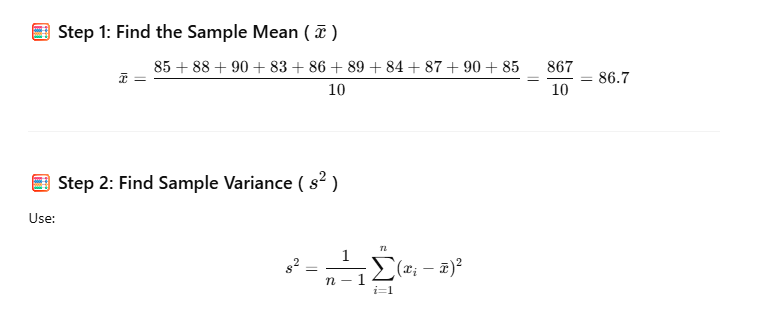



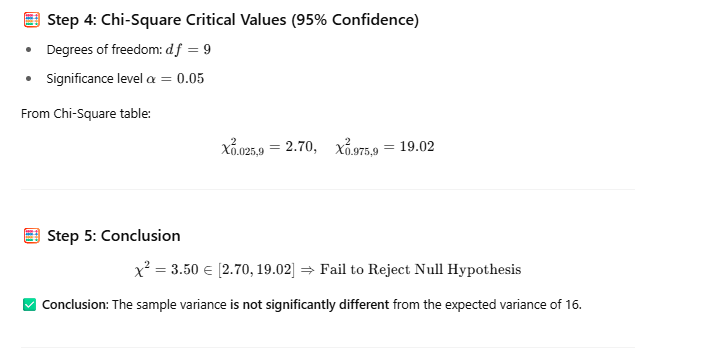

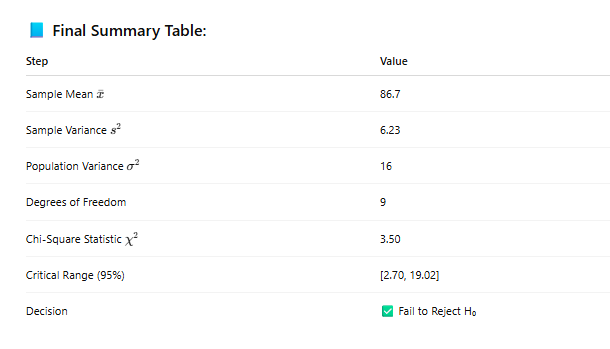




Example 2:

🏗️ Use Case: Testing the variability in concrete strength

📌 Situation:

You are a civil engineer checking the compressive strength of concrete cubes taken from a construction site.

You expect the variance of compressive strength to be within a known range (based on standards, e.g., 25 MPa²).

You collect n = 10 samples and measure their strength.

You calculate the sample variance from those 10 cubes.

You now want to test: Is the variability (variance) of your sample significantly different from the known standard variance?


This is where the Chi-Square distribution helps — because:

> When data is normally distributed, the test statistic

\chi^2 = \frac{(n - 1) \cdot s^2}{\sigma^2} ] follows a Chi-Square distribution with  degrees of freedom.




In [2]:
# Chi-Square Test for Variance

import numpy as np
from scipy.stats import chi2

# Sample data (concrete cube strength in MPa)
strengths = np.array([32, 35, 30, 28, 34, 33, 31, 29, 36, 30])

n = len(strengths)
sample_variance = np.var(strengths, ddof=1)  # Sample variance (s^2)
expected_variance = 25  # Standard/expected variance (σ^2)

# Chi-square test statistic
chi_square_stat = (n - 1) * sample_variance / expected_variance

# Confidence interval (95%)
alpha = 0.05
lower_critical = chi2.ppf(alpha / 2, df=n - 1)
upper_critical = chi2.ppf(1 - alpha / 2, df=n - 1)

print(f"Sample Variance = {sample_variance:.2f}")
print(f"Chi-Square Statistic = {chi_square_stat:.2f}")
print(f"Chi-Square Critical Range: [{lower_critical:.2f}, {upper_critical:.2f}]")

# Decision
if chi_square_stat < lower_critical or chi_square_stat > upper_critical:
    print("Reject Null Hypothesis: Variance is significantly different.")
else:
    print("Fail to Reject Null: Variance is within expected range.")


Sample Variance = 7.07
Chi-Square Statistic = 2.54
Chi-Square Critical Range: [2.70, 19.02]
Reject Null Hypothesis: Variance is significantly different.


Sample Variance = 7.07
Chi-Square Statistic = 2.54
Chi-Square Critical Range: [2.70, 19.02]
Reject Null Hypothesis: Variance is significantly different.


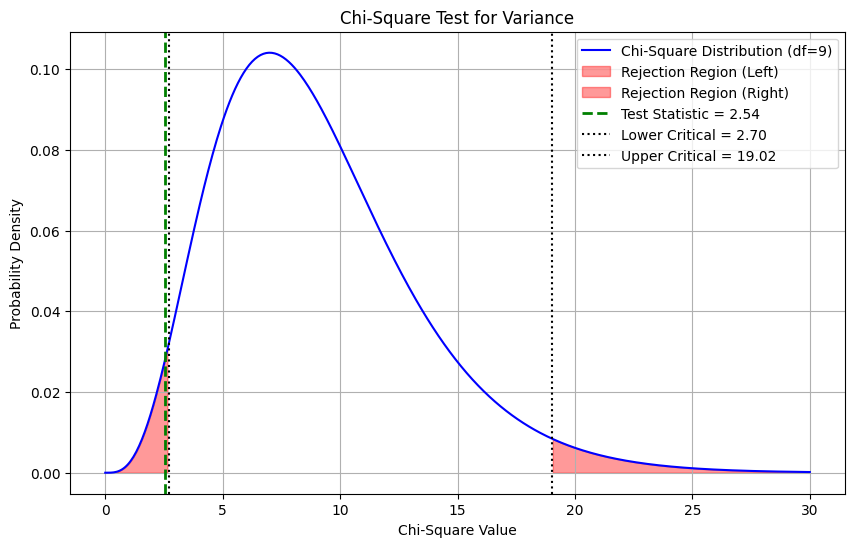

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Sample data (concrete cube strength in MPa)
strengths = np.array([32, 35, 30, 28, 34, 33, 31, 29, 36, 30])

n = len(strengths)
sample_variance = np.var(strengths, ddof=1)  # Sample variance (s^2)
expected_variance = 25  # Standard/expected variance (σ^2)

# Chi-square test statistic
chi_square_stat = (n - 1) * sample_variance / expected_variance

# Confidence interval (95%)
alpha = 0.05
df = n - 1
lower_critical = chi2.ppf(alpha / 2, df=df)
upper_critical = chi2.ppf(1 - alpha / 2, df=df)

print(f"Sample Variance = {sample_variance:.2f}")
print(f"Chi-Square Statistic = {chi_square_stat:.2f}")
print(f"Chi-Square Critical Range: [{lower_critical:.2f}, {upper_critical:.2f}]")

# Decision
if chi_square_stat < lower_critical or chi_square_stat > upper_critical:
    print("Reject Null Hypothesis: Variance is significantly different.")
else:
    print("Fail to Reject Null: Variance is within expected range.")

# ------------------------------
# Plotting the Chi-Square Distribution
# ------------------------------
x = np.linspace(0, 30, 500)
y = chi2.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f"Chi-Square Distribution (df={df})", color='blue')

# Fill critical regions
plt.fill_between(x, y, where=(x < lower_critical), color='red', alpha=0.4, label="Rejection Region (Left)")
plt.fill_between(x, y, where=(x > upper_critical), color='red', alpha=0.4, label="Rejection Region (Right)")

# Mark the test statistic
plt.axvline(chi_square_stat, color='green', linestyle='--', linewidth=2, label=f"Test Statistic = {chi_square_stat:.2f}")

# Mark critical values
plt.axvline(lower_critical, color='black', linestyle=':', label=f"Lower Critical = {lower_critical:.2f}")
plt.axvline(upper_critical, color='black', linestyle=':', label=f"Upper Critical = {upper_critical:.2f}")

plt.title("Chi-Square Test for Variance")
plt.xlabel("Chi-Square Value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

✅ Output Meaning:

If your chi-square statistic falls outside the critical range, it means your variance is too low or too high — indicating inconsistency in concrete quality.

If it's inside the range, the concrete quality is consistent with expectations.